# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'D:/機器學習100天/data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
data = app_train.corr()['TARGET'].sort_values(ascending = False)
data

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


In [7]:
#最大的15個
data.head(15)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [8]:
#最小的15個
data.tail(15).sort_values(ascending = True)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

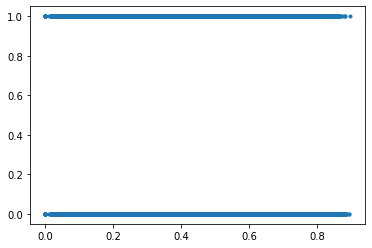

In [9]:
plt.plot(app_train['EXT_SOURCE_3'], app_train['TARGET'], '.')

In [10]:
data_column = pd.DataFrame(data).reset_index(inplace=False)['index']

圖畫出來，都分布在上下兩側，不是1就是0

TARGET and TARGET


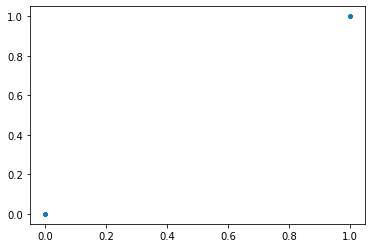

DAYS_EMPLOYED and TARGET


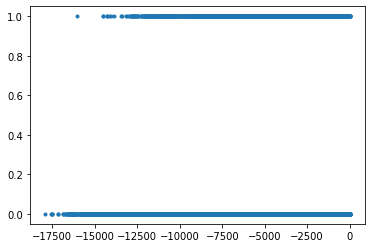

REGION_RATING_CLIENT_W_CITY and TARGET


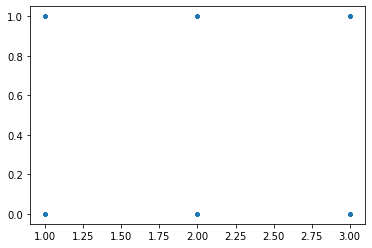

REGION_RATING_CLIENT and TARGET


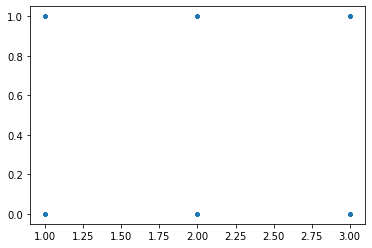

DAYS_LAST_PHONE_CHANGE and TARGET


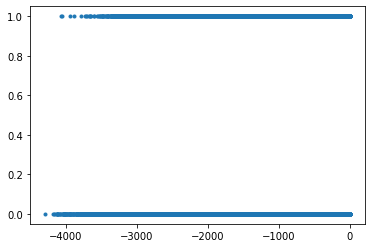

DAYS_ID_PUBLISH and TARGET


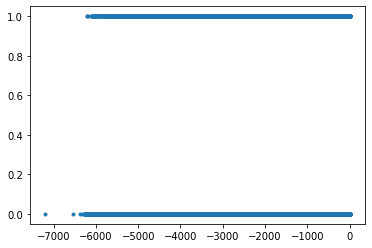

REG_CITY_NOT_WORK_CITY and TARGET


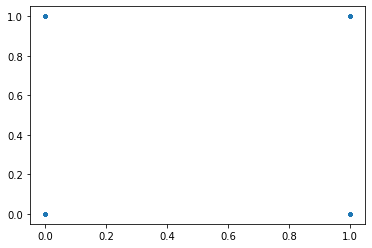

FLAG_EMP_PHONE and TARGET


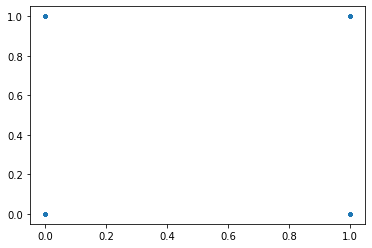

REG_CITY_NOT_LIVE_CITY and TARGET


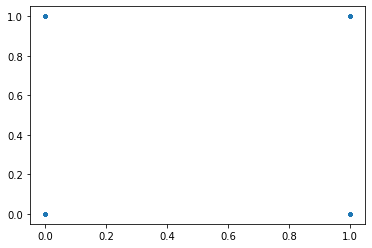

FLAG_DOCUMENT_3 and TARGET


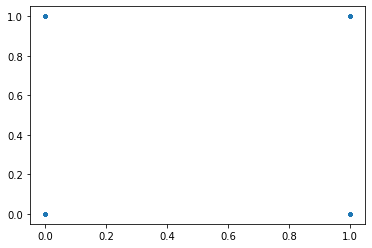

DAYS_REGISTRATION and TARGET


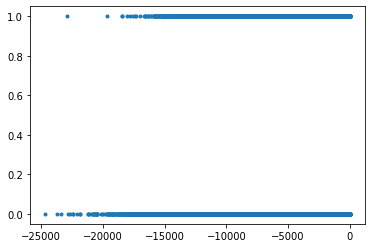

OWN_CAR_AGE and TARGET


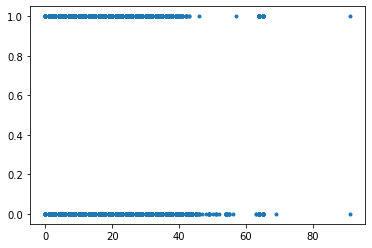

LIVE_CITY_NOT_WORK_CITY and TARGET


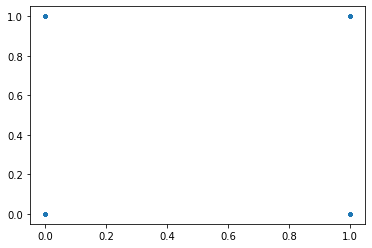

DEF_30_CNT_SOCIAL_CIRCLE and TARGET


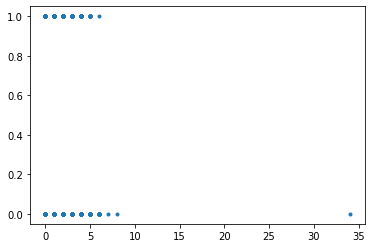

DEF_60_CNT_SOCIAL_CIRCLE and TARGET


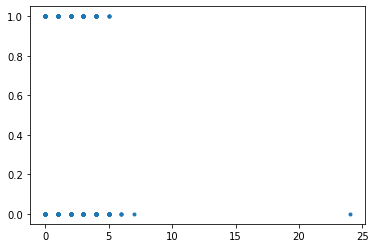

FLAG_WORK_PHONE and TARGET


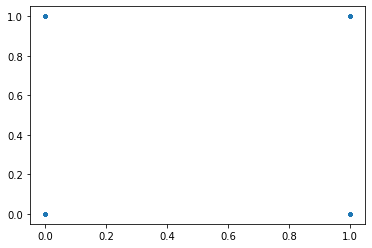

AMT_REQ_CREDIT_BUREAU_YEAR and TARGET


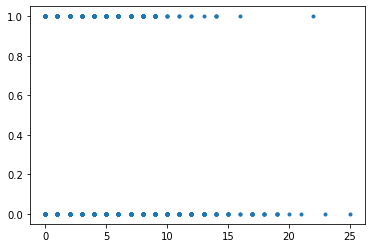

CNT_CHILDREN and TARGET


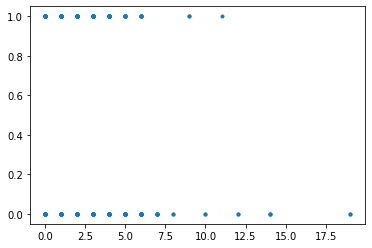

CNT_FAM_MEMBERS and TARGET


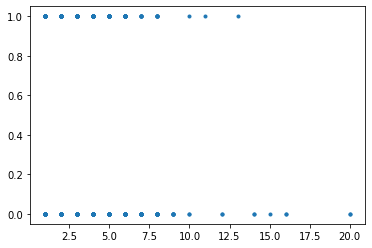

OBS_30_CNT_SOCIAL_CIRCLE and TARGET


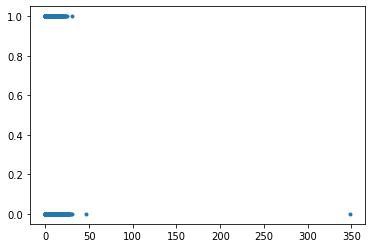

OBS_60_CNT_SOCIAL_CIRCLE and TARGET


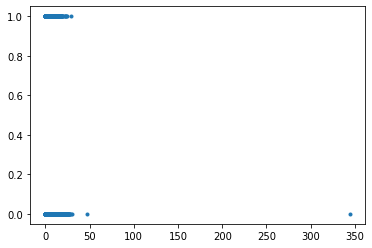

REG_REGION_NOT_WORK_REGION and TARGET


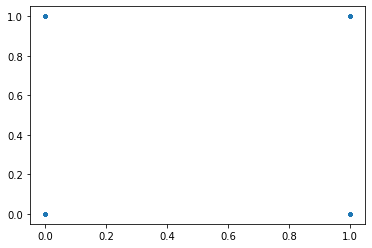

REG_REGION_NOT_LIVE_REGION and TARGET


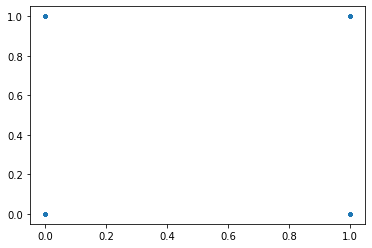

FLAG_DOCUMENT_2 and TARGET


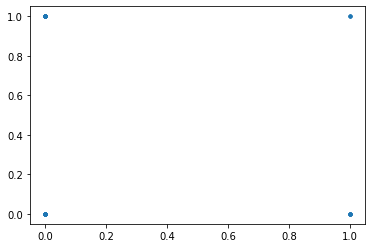

FLAG_DOCUMENT_21 and TARGET


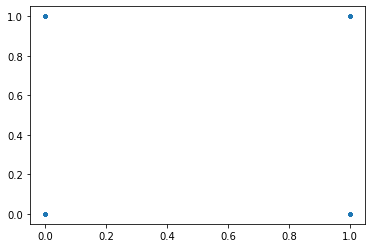

LIVE_REGION_NOT_WORK_REGION and TARGET


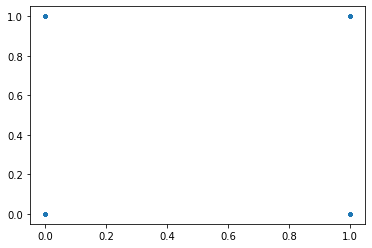

AMT_REQ_CREDIT_BUREAU_DAY and TARGET


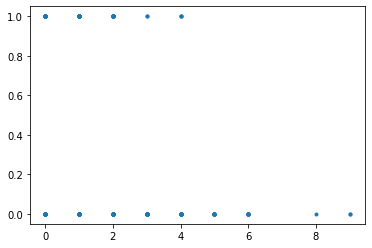

AMT_REQ_CREDIT_BUREAU_HOUR and TARGET


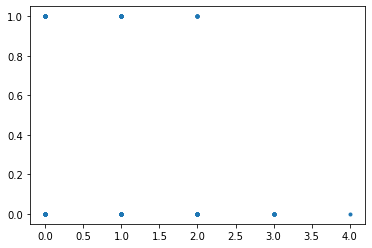

AMT_REQ_CREDIT_BUREAU_WEEK and TARGET


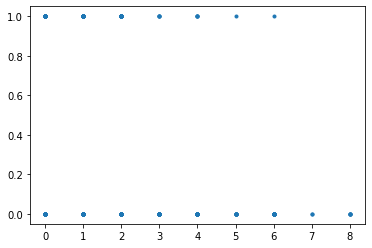

FLAG_MOBIL and TARGET


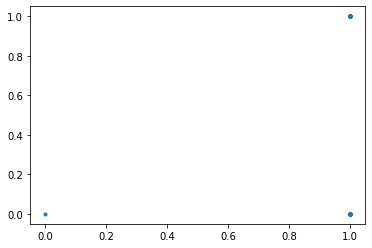

FLAG_CONT_MOBILE and TARGET


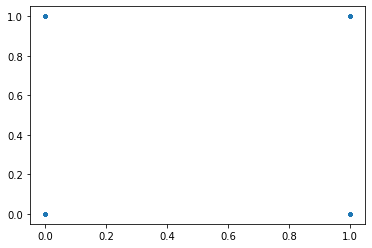

FLAG_DOCUMENT_20 and TARGET


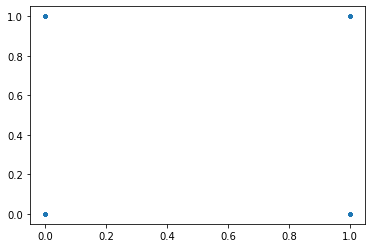

FLAG_DOCUMENT_5 and TARGET


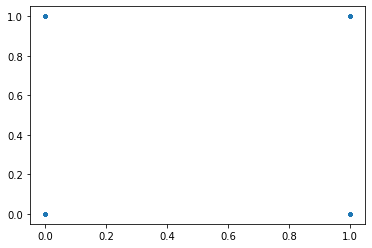

FLAG_DOCUMENT_12 and TARGET


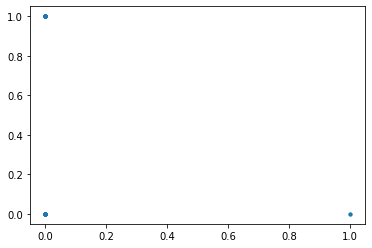

FLAG_DOCUMENT_19 and TARGET


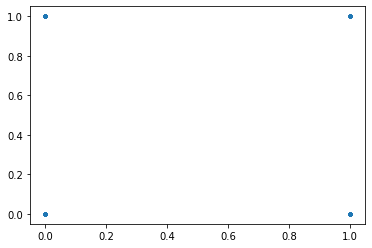

FLAG_DOCUMENT_10 and TARGET


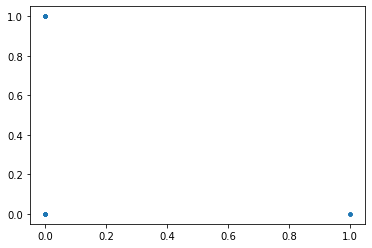

FLAG_DOCUMENT_7 and TARGET


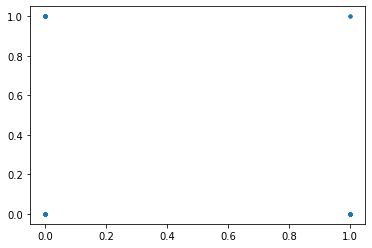

NONLIVINGAPARTMENTS_MODE and TARGET


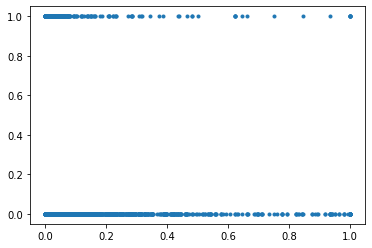

FLAG_EMAIL and TARGET


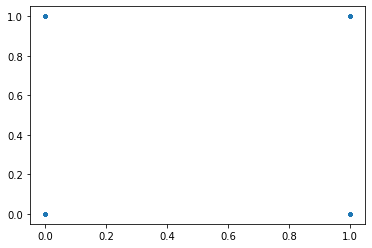

AMT_REQ_CREDIT_BUREAU_QRT and TARGET


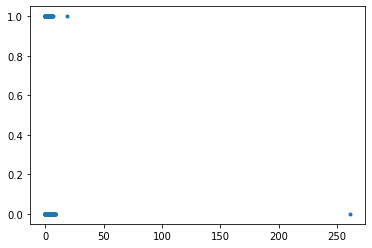

SK_ID_CURR and TARGET


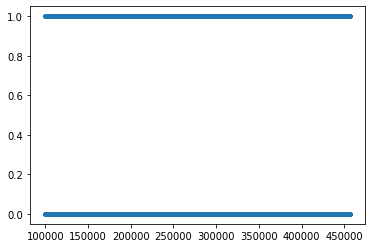

FLAG_DOCUMENT_4 and TARGET


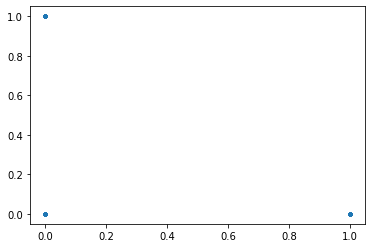

NONLIVINGAPARTMENTS_MEDI and TARGET


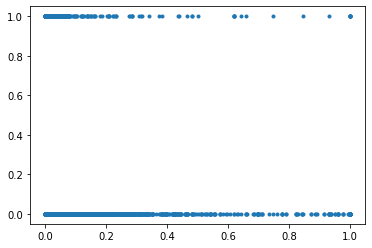

NONLIVINGAPARTMENTS_AVG and TARGET


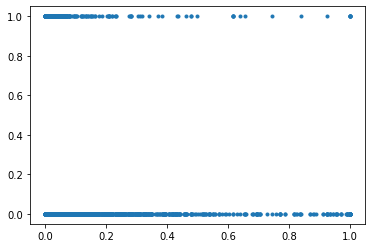

FLAG_DOCUMENT_17 and TARGET


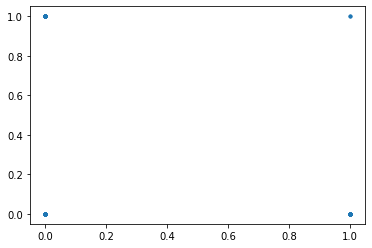

AMT_INCOME_TOTAL and TARGET


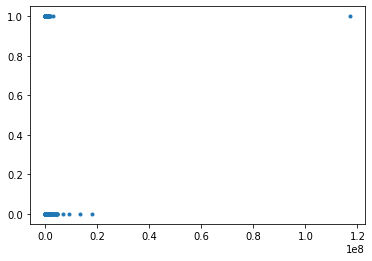

FLAG_DOCUMENT_11 and TARGET


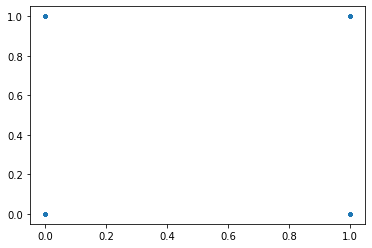

FLAG_DOCUMENT_9 and TARGET


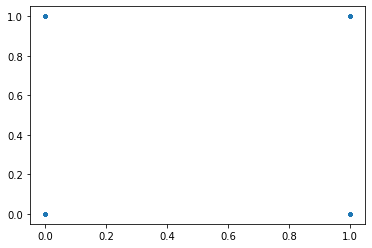

FLAG_OWN_REALTY and TARGET


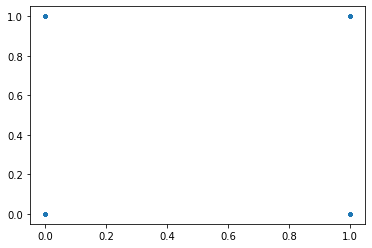

FLAG_DOCUMENT_15 and TARGET


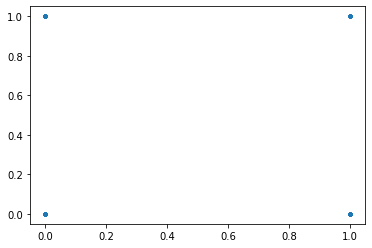

FLAG_DOCUMENT_18 and TARGET


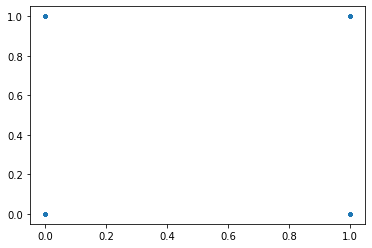

FLAG_DOCUMENT_8 and TARGET


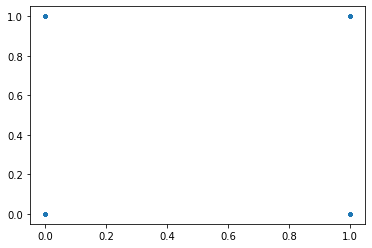

YEARS_BEGINEXPLUATATION_MODE and TARGET


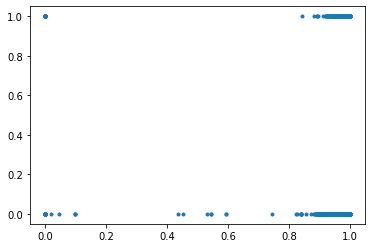

FLAG_DOCUMENT_14 and TARGET


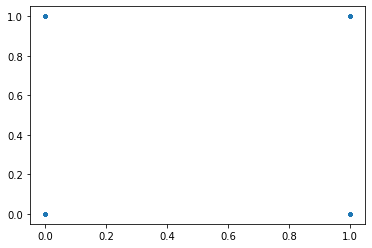

YEARS_BEGINEXPLUATATION_AVG and TARGET


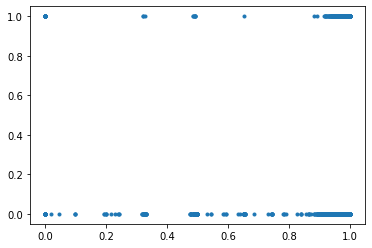

YEARS_BEGINEXPLUATATION_MEDI and TARGET


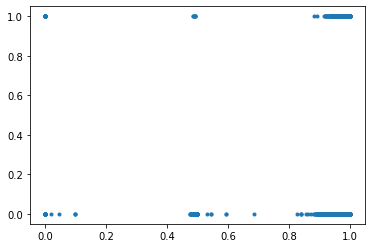

LANDAREA_MODE and TARGET


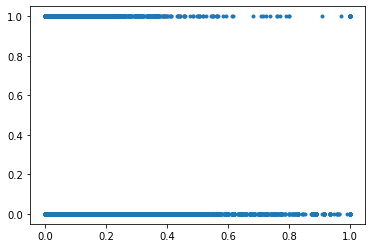

LANDAREA_AVG and TARGET


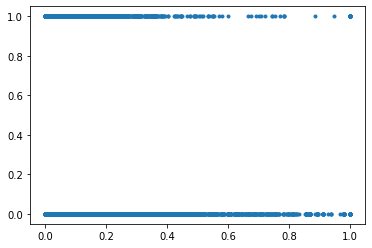

LANDAREA_MEDI and TARGET


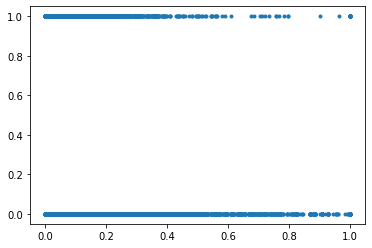

FLAG_DOCUMENT_13 and TARGET


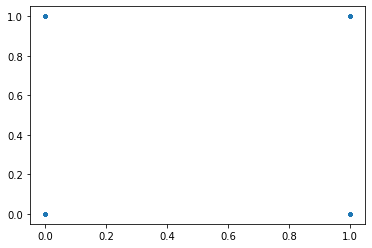

FLAG_DOCUMENT_16 and TARGET


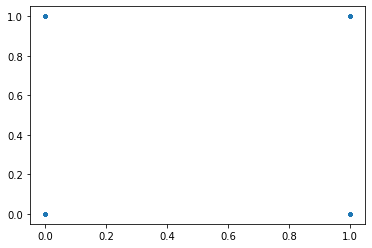

AMT_REQ_CREDIT_BUREAU_MON and TARGET


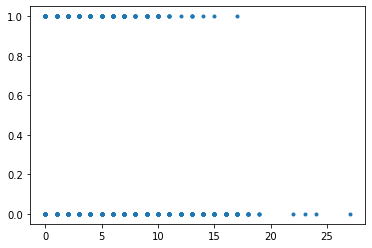

NONLIVINGAREA_MODE and TARGET


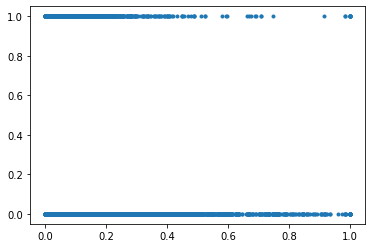

AMT_ANNUITY and TARGET


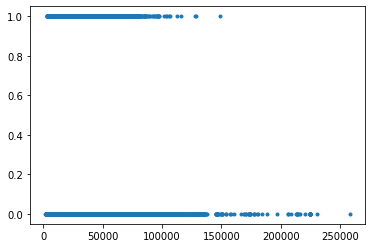

NONLIVINGAREA_MEDI and TARGET


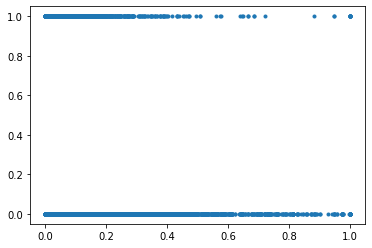

NONLIVINGAREA_AVG and TARGET


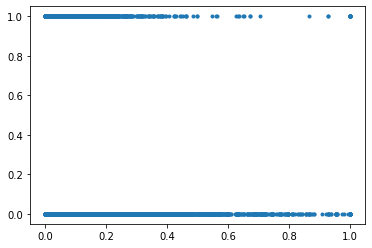

COMMONAREA_MODE and TARGET


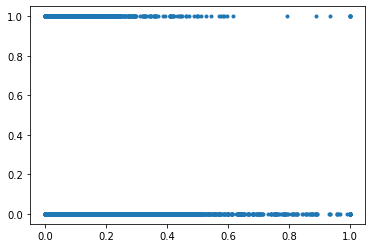

ENTRANCES_MODE and TARGET


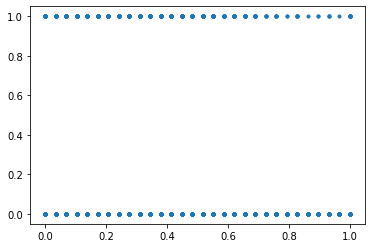

COMMONAREA_AVG and TARGET


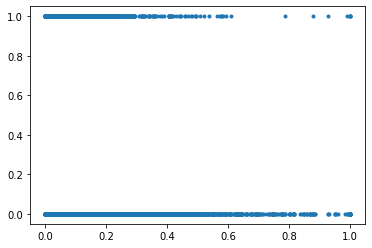

COMMONAREA_MEDI and TARGET


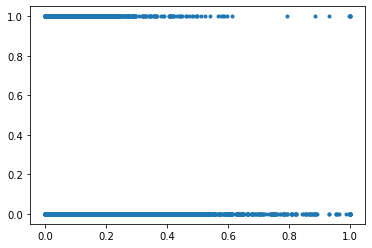

ENTRANCES_MEDI and TARGET


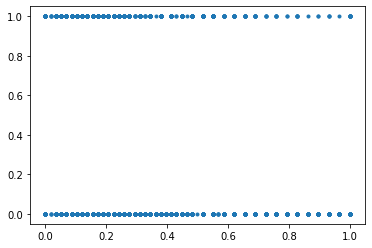

ENTRANCES_AVG and TARGET


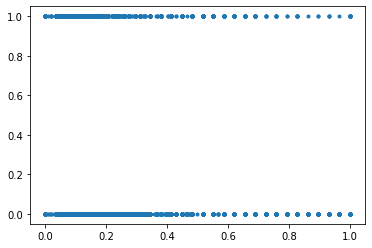

BASEMENTAREA_MODE and TARGET


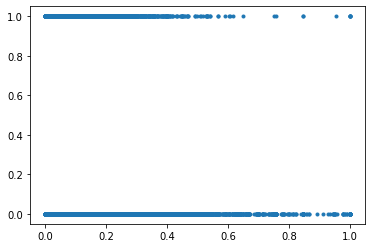

FLAG_OWN_CAR and TARGET


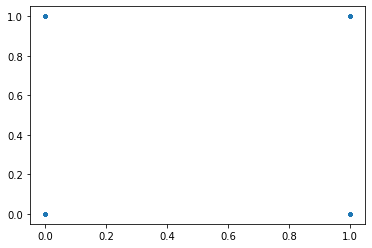

YEARS_BUILD_MODE and TARGET


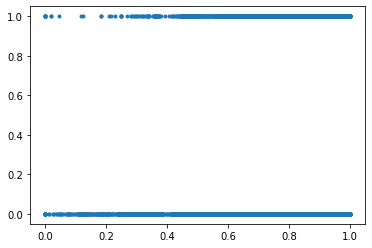

BASEMENTAREA_MEDI and TARGET


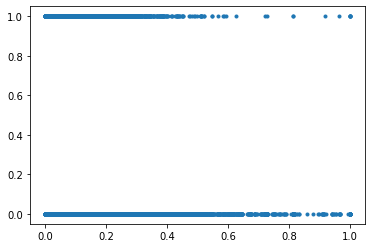

YEARS_BUILD_AVG and TARGET


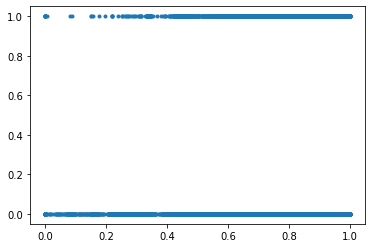

YEARS_BUILD_MEDI and TARGET


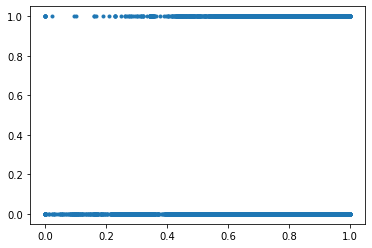

BASEMENTAREA_AVG and TARGET


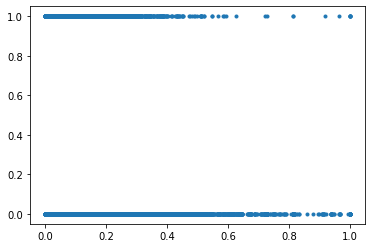

LIVINGAPARTMENTS_MODE and TARGET


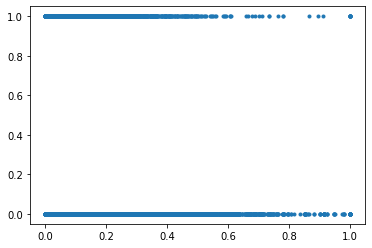

FLAG_PHONE and TARGET


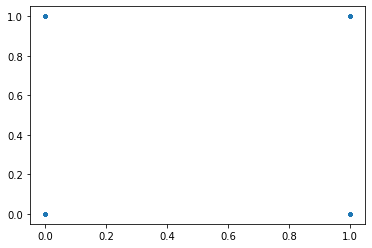

HOUR_APPR_PROCESS_START and TARGET


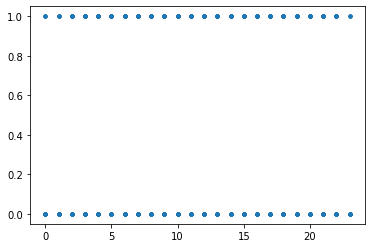

LIVINGAPARTMENTS_MEDI and TARGET


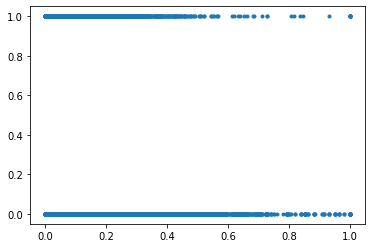

LIVINGAPARTMENTS_AVG and TARGET


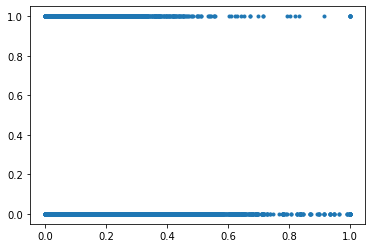

APARTMENTS_MODE and TARGET


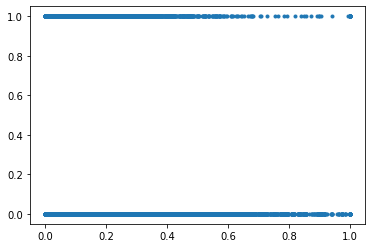

FLAG_DOCUMENT_6 and TARGET


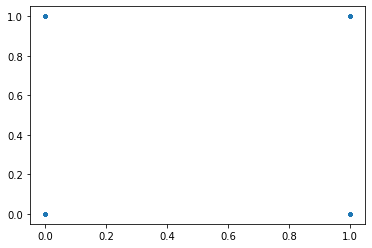

APARTMENTS_MEDI and TARGET


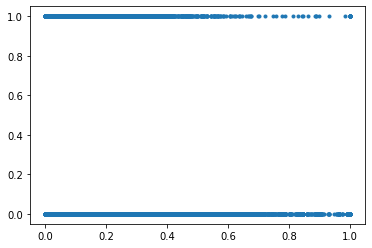

APARTMENTS_AVG and TARGET


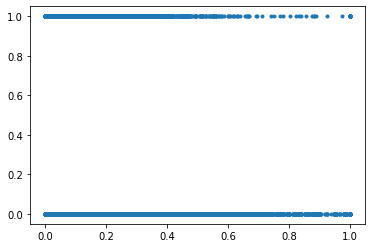

AMT_CREDIT and TARGET


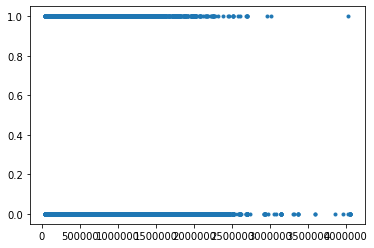

LIVINGAREA_MODE and TARGET


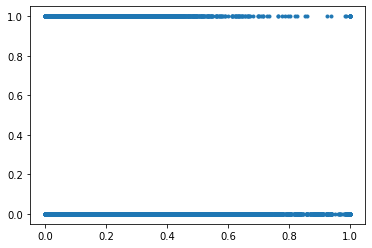

NAME_CONTRACT_TYPE and TARGET


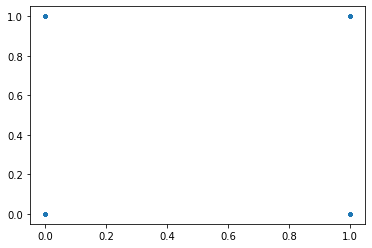

ELEVATORS_MODE and TARGET


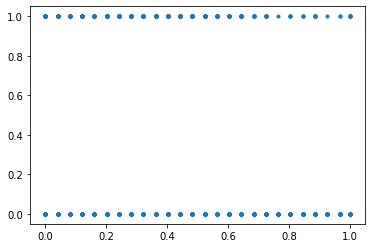

TOTALAREA_MODE and TARGET


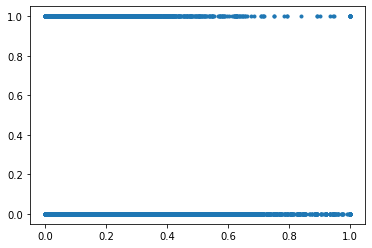

FLOORSMIN_MODE and TARGET


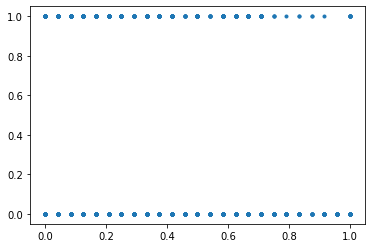

LIVINGAREA_MEDI and TARGET


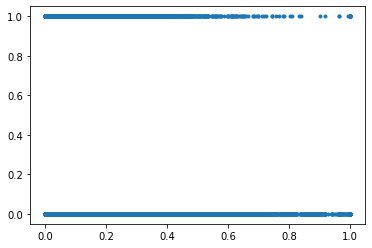

LIVINGAREA_AVG and TARGET


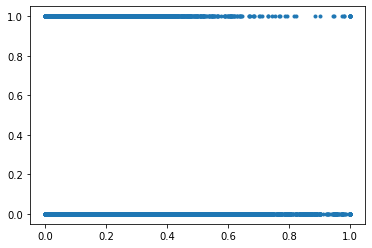

FLOORSMIN_MEDI and TARGET


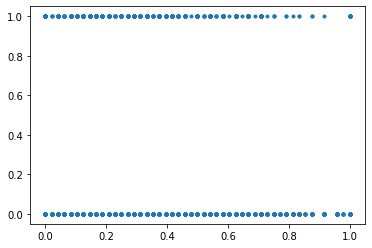

FLOORSMIN_AVG and TARGET


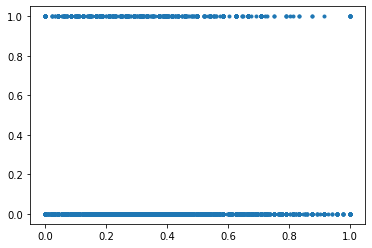

ELEVATORS_MEDI and TARGET


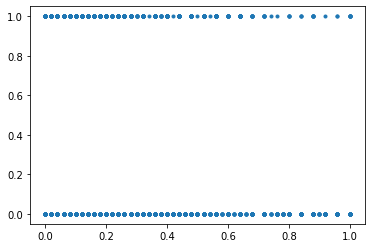

ELEVATORS_AVG and TARGET


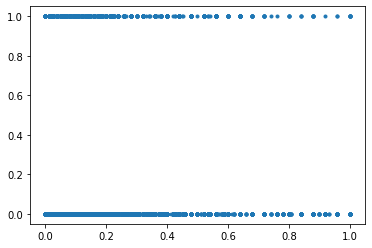

REGION_POPULATION_RELATIVE and TARGET


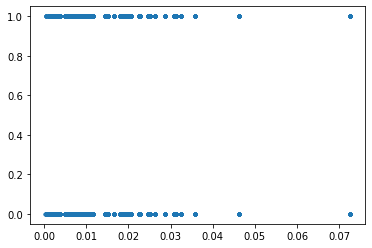

AMT_GOODS_PRICE and TARGET


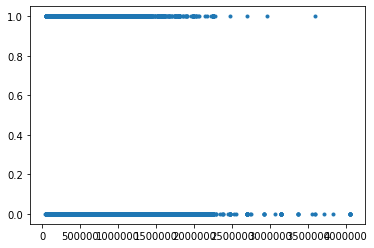

FLOORSMAX_MODE and TARGET


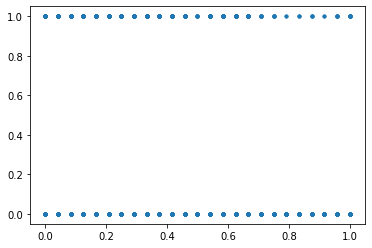

FLOORSMAX_MEDI and TARGET


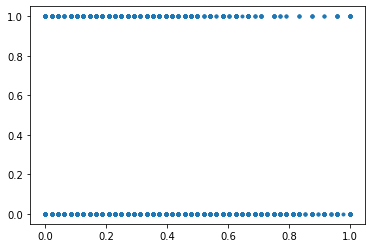

FLOORSMAX_AVG and TARGET


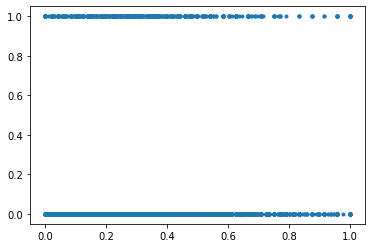

DAYS_EMPLOYED_ANOM and TARGET


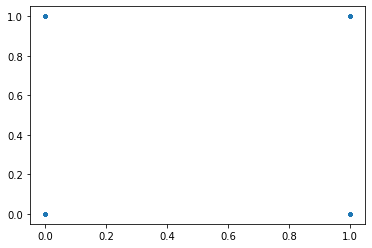

DAYS_BIRTH and TARGET


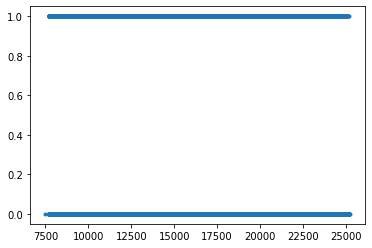

EXT_SOURCE_1 and TARGET


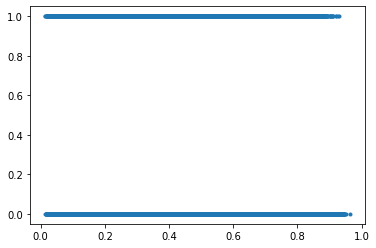

EXT_SOURCE_2 and TARGET


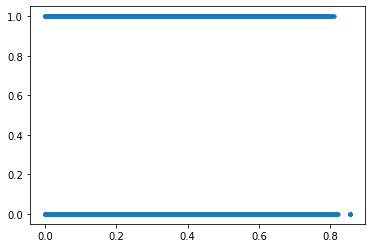

EXT_SOURCE_3 and TARGET


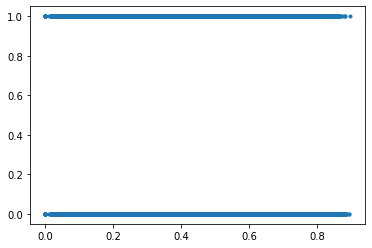

In [11]:
for col in data_column:
    print(f'{col} and TARGET')
    plt.plot(app_train[col], app_train['TARGET'], '.')
    plt.show()